In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
user_path = os.getenv('user_path')
users = pd.read_csv(user_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hritik/Documents/mlops_in_travel/Datasets/users.csv'

In [3]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [5]:
users.describe

<bound method NDFrame.describe of       code        company              name  gender  age
0        0           4You         Roy Braun    male   21
1        1           4You    Joseph Holsten    male   37
2        2           4You     Wilma Mcinnis  female   48
3        3           4You      Paula Daniel  female   23
4        4           4You   Patricia Carson  female   44
...    ...            ...               ...     ...  ...
1335  1335  Umbrella LTDA  Albert Garroutte    male   23
1336  1336  Umbrella LTDA        Kim Shores  female   40
1337  1337  Umbrella LTDA     James Gimenez    male   28
1338  1338  Umbrella LTDA      Viola Agosta  female   52
1339  1339  Umbrella LTDA    Paul Rodriguez    male   35

[1340 rows x 5 columns]>

In [6]:
users['gender'].value_counts()

gender
male      452
female    448
none      440
Name: count, dtype: int64

In [7]:
# Filter the users DataFrame to include only rows where gender is 'male' or 'female'
users=users[(users['gender']=='male') | (users['gender']=='female') ]

In [8]:
# Encoding usercode and company to numeric values
label_encoder = LabelEncoder()

users['company_encoded'] = label_encoder.fit_transform(users['company'])
users['gender_encoded'] = label_encoder.fit_transform(users['gender'])

users.head()

,code,company,name,gender,age,company_encoded,gender_encoded
0,0,4You,Roy Braun,male,21,0,1
1,1,4You,Joseph Holsten,male,37,0,1
2,2,4You,Wilma Mcinnis,female,48,0,0
3,3,4You,Paula Daniel,female,23,0,0
4,4,4You,Patricia Carson,female,44,0,0


In [9]:
# Intializing the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [10]:
# Encode text-based columns and add embeddings to the DataFrame
# Here we assume 'name' is a text column that we want to encode

text_columns = ['name']

for column in text_columns:
    users[column + '_embedding'] = users[column].apply(lambda text: model.encode(text))

In [11]:
# Convert the embeddings to a list format for further processing
text_embeddings = users[text_columns].values.tolist()

In [12]:
# Perform PCA on the text embeddings to reduce dimensionality
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
text_columns = ['name']

In [13]:
# Initialize an empty array to hold the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(users), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = users[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

    
numerical_features=['code','company_encoded','age']


X_numerical = users[numerical_features].values

In [14]:
# Combine PCA-transformed text embeddings with numerical features
X = np.hstack((text_embeddings_pca, X_numerical))

y = users['gender_encoded']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression Model

In [16]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [17]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Print the predicted gender values
print(y_pred_logistic)

[1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


In [18]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_logistic)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [19]:
# Check for overfitting by comparing training and validation accuracies
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.9708333333333333
Validation Accuracy: 0.9666666666666667
The model is overfitting.


#### Decision Tree Classifier

In [20]:
# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = dt_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n", report)

Accuracy: 0.4388888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.36        77
           1       0.51      0.49      0.50       103

    accuracy                           0.44       180
   macro avg       0.43      0.43      0.43       180
weighted avg       0.44      0.44      0.44       180



In [21]:
# Check for overfitting by comparing training and validation accuracies
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = dt_classifier.predict(X_train)
y_val_pred = dt_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9555555555555556
The model is overfitting.


## Random Forest Classifier

In [22]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)

Accuracy: 0.9611111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95        77
           1       0.94      0.99      0.97       103

    accuracy                           0.96       180
   macro avg       0.97      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [23]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9833333333333333
The model is overfitting.


## Gradient Boosting Classifier

In [24]:
# Initialize a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = gb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_gb)
print("\nClassification Report:\n", report)

Accuracy: 0.5944444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57        77
           1       0.67      0.57      0.62       103

    accuracy                           0.59       180
   macro avg       0.60      0.60      0.59       180
weighted avg       0.61      0.59      0.60       180



In [25]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Predictions on training and validation sets
y_train_pred = gb_classifier.predict(X_train)
y_val_pred = gb_classifier.predict(X_val)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Check if overfitting
if train_accuracy > val_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 1.0
Validation Accuracy: 0.9666666666666667
The model is overfitting.


## ROC-AUC Curve

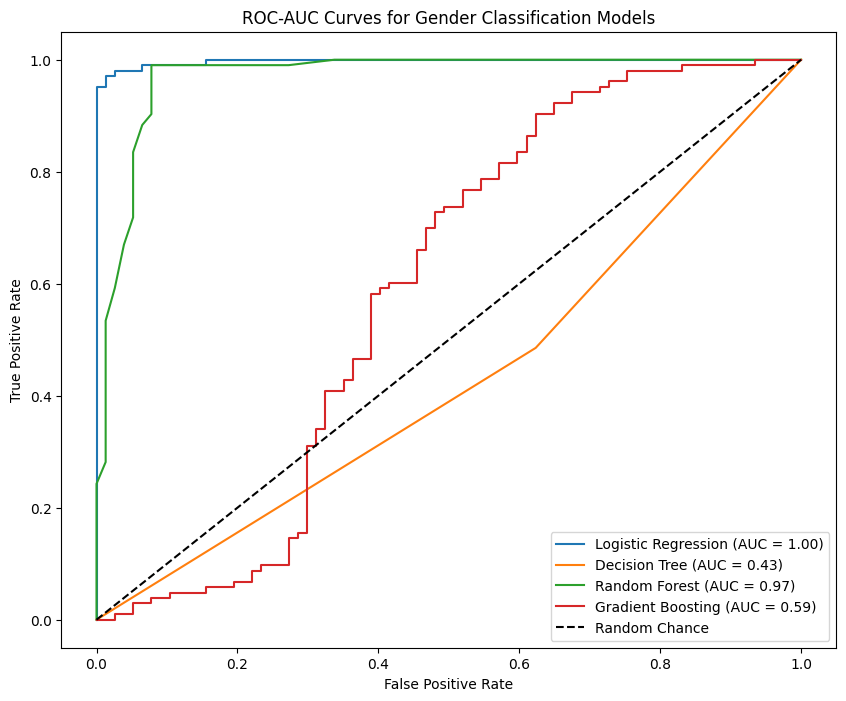

In [26]:
# Evaluate the models using ROC-AUC curves
# Logistic Regression
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Decision Tree
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Random Forest
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Gradient Boosting
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, label="Logistic Regression (AUC = %0.2f)" % logistic_auc)
plt.plot(dt_fpr, dt_tpr, label="Decision Tree (AUC = %0.2f)" % dt_auc)
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = %0.2f)" % rf_auc)
plt.plot(gb_fpr, gb_tpr, label="Gradient Boosting (AUC = %0.2f)" % gb_auc)

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Gender Classification Models")
plt.legend()
plt.show()

## Model selection and Hyperparameter Tuning

In [27]:
# Hyperparameter tuning for Logistic Regression using Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Perform Grid Search Cross-Validation
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Logistic Regression model with the best hyperparameters
logistic_model_tuned = LogisticRegression(**best_params)
logistic_model_tuned.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred_tuned = logistic_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Accuracy of tuned Logistic Regression model:", accuracy_tuned)

Accuracy of tuned Logistic Regression model: 0.9666666666666667


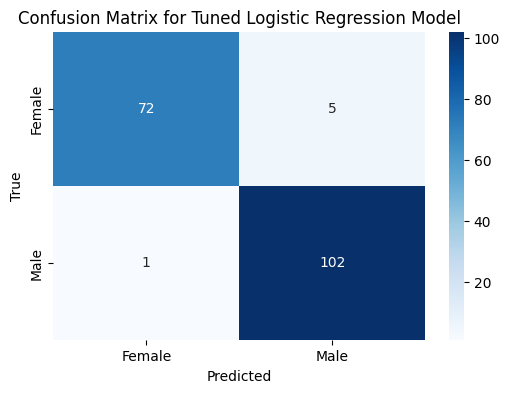

In [28]:
# Plot the confusion matrix for the tuned model
y_pred_tuned = logistic_model_tuned.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Define labels for the confusion matrix
labels = ['Female', 'Male']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Tuned Logistic Regression Model")
plt.show()

## Saving the Logistic Regression Model in pickle file

In [ ]:
# Save the tuned logistic regression model in pickle format
with open('logistic_model_tuned.pkl', 'wb') as file:
    pickle.dump(logistic_model_tuned, file)

# Save the scaler in pickle format
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
# Save the PCA model in pickle format
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)